In [1]:
# Import libraries:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import accuracy_score, silhouette_score

In [2]:
iris = pd.read_csv("Iris.csv", index_col = 0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


I'm going to use two features: Sepal Length and Petal Length.

In [3]:
# Petal length vs Sepal length: 
# Prepare data for training:
X = iris[['PetalLengthCm','SepalLengthCm']].values.reshape(-1,2)  
print('Data size:', X.shape)

Data size: (150, 2)


In [4]:
# Scaling to unify measurements:
X = preprocessing.scale(X) 

In [5]:
# Compute the distance matrix first for the two metrics: euclidean and cityblock:
dist_euclid = pdist(X, metric='euclidean')
dist_citybl = pdist(X, metric='cityblock')
# Create a dictionary of the above:
distance_metrics = {'euclidean': dist_euclid, 'cityblock': dist_citybl}

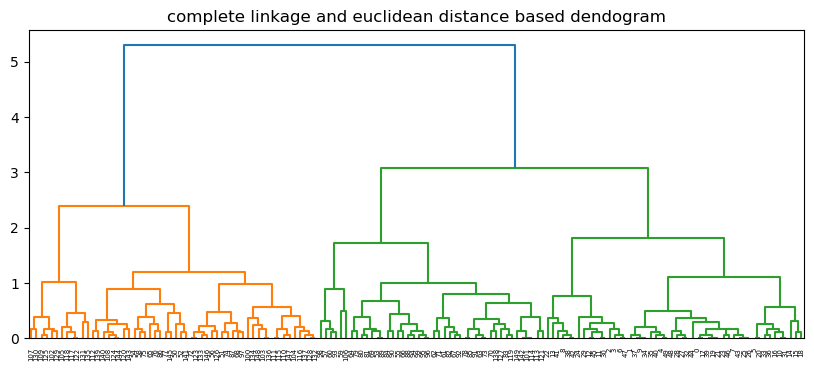

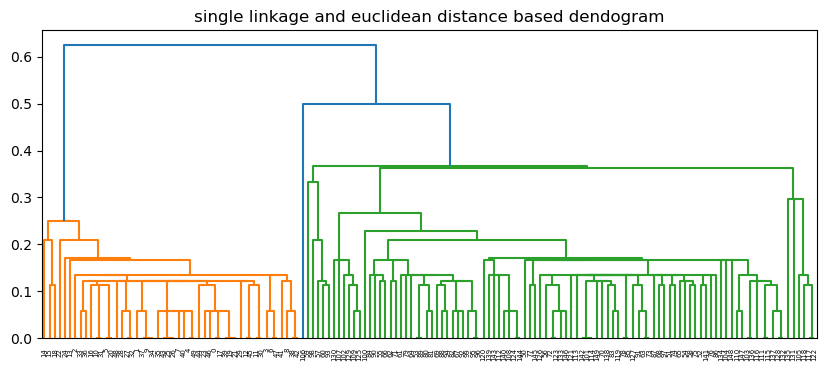

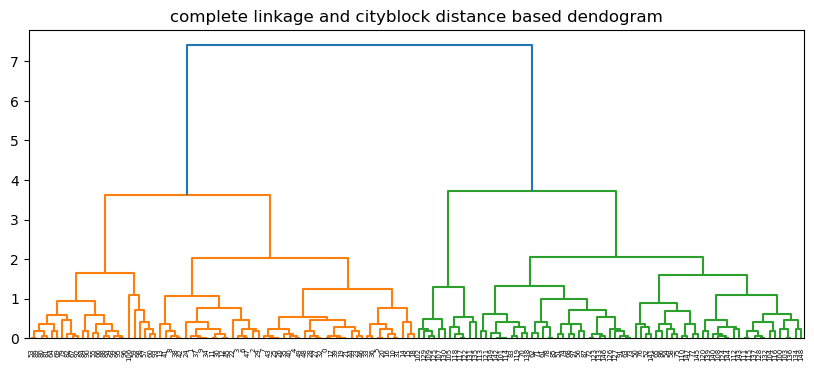

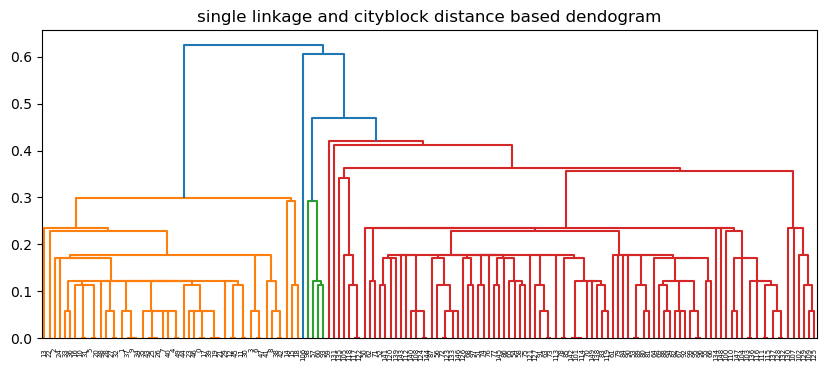

In [6]:
# Perform hierarchical clustering in a form of four dendrograms for 'cityblock' distance metrics and two linkages: 'complete' and 'single':
linkages = ['complete', 'single']
for keys in distance_metrics:
    for i in linkages:
        plt.figure(figsize=[10,4])
        plt.title(f"{i} linkage and {keys} distance based dendogram") 
        dendrogram(linkage(distance_metrics[keys], method = i))

I am choosing the first dendrogram with the 'euclidean' distance and 'complete' linkage parameters. Out of four, the first dendrogram was the closest to visually separate data into the three desired clusters (although model classified data into two clusters). So, using visual criteria, if we cut the dendrogram horizontally at y = 3, we will get three clusters.

Text(0, 0.5, 'Sepal length')

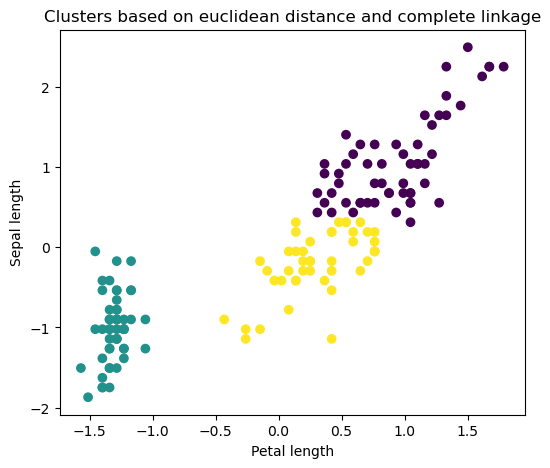

In [7]:
# For the number of clusters I choose 3.
plt.figure(figsize=(6,5))

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
cluster.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=cluster.labels_)  
plt.title('Clusters based on euclidean distance and complete linkage')
plt.xlabel('Petal length')
plt.ylabel('Sepal length')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

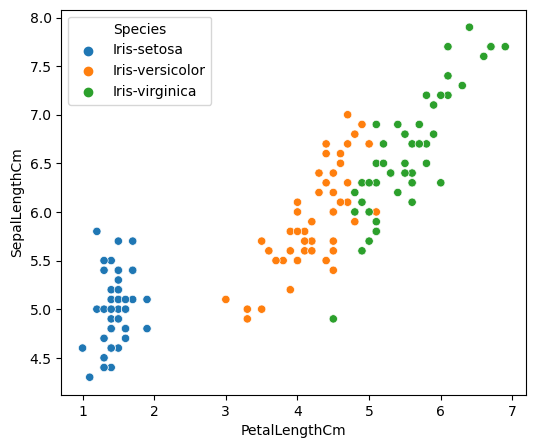

In [8]:
# To compare, let's look at the real distribution of species based on Petal and Sepal Lengths:
fig = plt.figure(figsize=(6,5))
sns.scatterplot(data=iris, x= iris['PetalLengthCm'], y= iris['SepalLengthCm'], hue='Species')

In [9]:
# Calculate Silhouette score:
score = round(silhouette_score(X, cluster.labels_, metric='euclidean'),2)
print("silhouette_score for num of clusters = 3:", score)

silhouette_score for num of clusters = 3: 0.53


The silhouette score for 3 clusters was 0.53, which points to relatively good cluster separation (value 0 = overlapping clusters, value 1 = clusters are dense and well separated from each other). 
The model separated samples into the three species, however it had problems separating some of the Iris versicolor and Iris virginica samples. The separation between these samples was horizontal instead of vertical.

Text(0, 0.5, 'Sepal length')

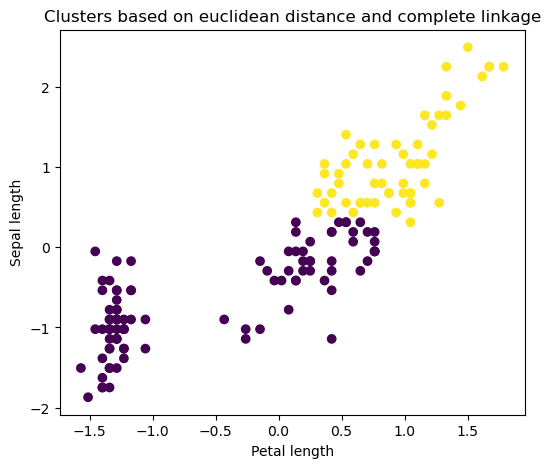

In [10]:
# For comparison, I would like to see what will be the outcome if I choose the number of clusters = 2.
plt.figure(figsize=(6,5))

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cluster.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=cluster.labels_)  
plt.title('Clusters based on euclidean distance and complete linkage')
plt.xlabel('Petal length')
plt.ylabel('Sepal length')

In [11]:
# Calculate Silhouette score for 2 clusters:
score = round(silhouette_score(X, cluster.labels_, metric='euclidean'),2)
print("silhouette_score for number of clusters = 2:", score)

silhouette_score for number of clusters = 2: 0.47


When selecting 2 clusters, the model assigned Iris versicolor to Iris setosa species, and produced a slightly worse silhouette score of 0.47